In [16]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from nsvd import NSVD
from norwai_regression import NSVDModel, ConvModule

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

device: cuda


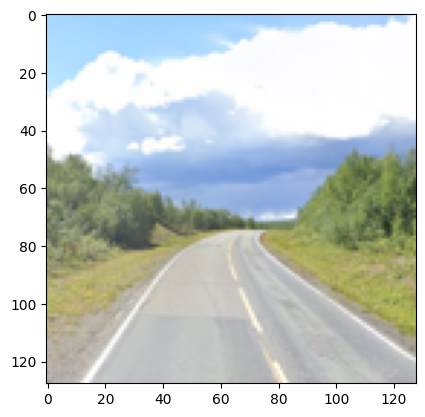

In [17]:
test_images = [{'file':'9w8nB2zvVz', 'loc':[69.1326326,23.3151797]}]
test_im = np.random.choice(test_images, 1)[0]

from PIL import Image

im = Image.open('./data/test_images/{}.png'.format(test_im['file'])).convert('RGB')
w, h = im.size
left = int((w - 512)/2)
top = int((h - 512)/2)
right = int((w + 512)/2)
bottom = int((h + 512)/2)

im = im.crop((left, top, right, bottom)).resize((128, 128))
im_data = torch.tensor(np.asarray(im).transpose(2, 0, 1))

plt.imshow(im_data.int().numpy().transpose(1, 2, 0))
plt.show()

In [18]:
mean = 135.4867 # fix this
std = 64.0806 # fix this
im_data = im_data.to(device)
im_data = (im_data - mean) / std

model = NSVDModel()
model = torch.load('./data/model_regression')
model.to(device)

guessed_loc = []
with torch.no_grad():
  y = model(im_data.unsqueeze(0)).flatten()
  guessed_loc = (y[0].item(), y[1].item())
  print(guessed_loc)

(66.4127426147461, 13.54780387878418)


In [19]:
import folium

real_loc = test_im['loc']

m = folium.Map((64.9701, 13.509217), zoom_start=4)
folium.CircleMarker(location=(real_loc[0], real_loc[1]), tooltip='real', radius=1, color='#0080bb', fill_color='#0080bb').add_to(m)
folium.CircleMarker(location=(guessed_loc[0], guessed_loc[1]), tooltip='guessed', radius=1, color='#d40834', fill_color='#d40834').add_to(m)
m
